In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:, 2:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
x = df.iloc[:, 0:2]
y = df.iloc[: , -1]

In [6]:
from sklearn.model_selection import train_test_split as split

In [7]:
train_x, test_x, train_y, test_y = split(x, y, test_size= 0.3) 

In [8]:
train_y.head()

147    0
112    0
47     0
304    0
62     0
Name: Purchased, dtype: int64

In [9]:
train_x.replace([np.inf, -np.inf], np.nan, inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler 

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(train_x)

StandardScaler()

In [13]:
scale_train_x = scaler.transform(train_x)
scale_test_x = scaler.transform(test_x)

In [14]:
scale_train_x = pd.DataFrame(scale_train_x, columns=train_x.columns)
scale_test_x = pd.DataFrame(scale_test_x, columns=test_x.columns)

In [15]:
scale_train_x.head()

,Age,EstimatedSalary
0,0.333994,-1.135772
1,0.044464,-0.236192
2,-1.017149,-0.439323
3,0.237484,-0.265210
4,-1.403189,-0.091098


In [16]:
scale_test_x.head()

,Age,EstimatedSalary
0,0.140974,-0.294229
1,1.009566,-1.048716
2,1.685137,1.621006
3,0.044464,-0.236192
4,-0.727618,0.315164


In [17]:
import matplotlib.pyplot as plt 


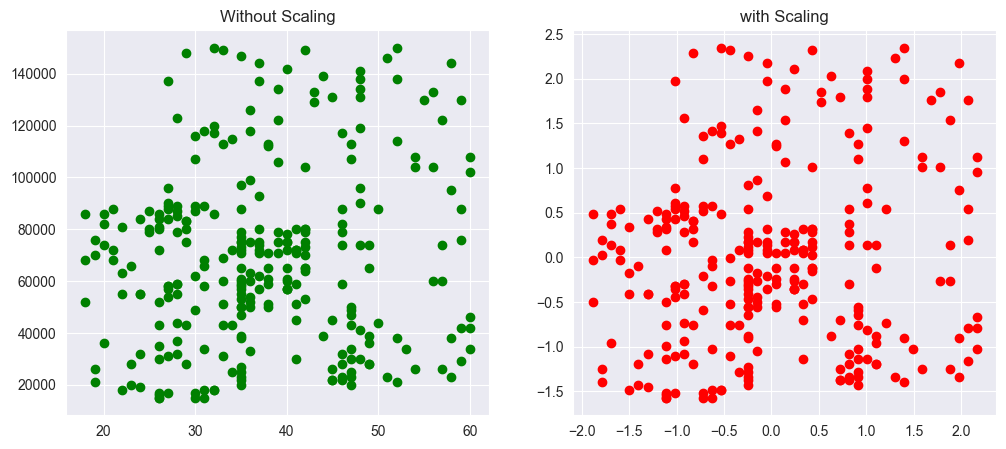

In [18]:
fig, (figure1, figure2) = plt.subplots(ncols=2, figsize = (12, 5))
figure1.set_title('Without Scaling')
figure1.scatter(train_x['Age'], train_x['EstimatedSalary'], color='green')

figure2.set_title('with Scaling')
figure2.scatter(scale_train_x['Age'], scale_train_x['EstimatedSalary'], color='red')


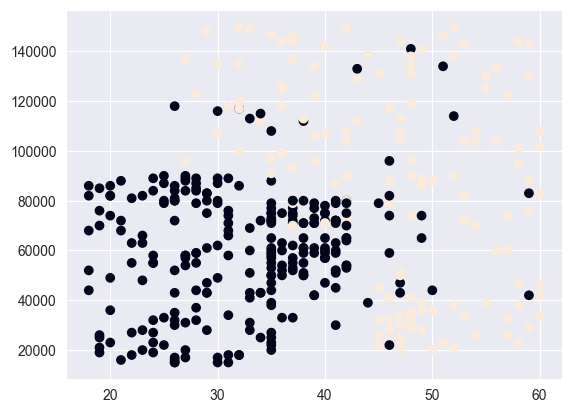

In [19]:
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Purchased'])

/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

<Axes: title={'center': 'With Scale'}, xlabel='Age', ylabel='Density'>

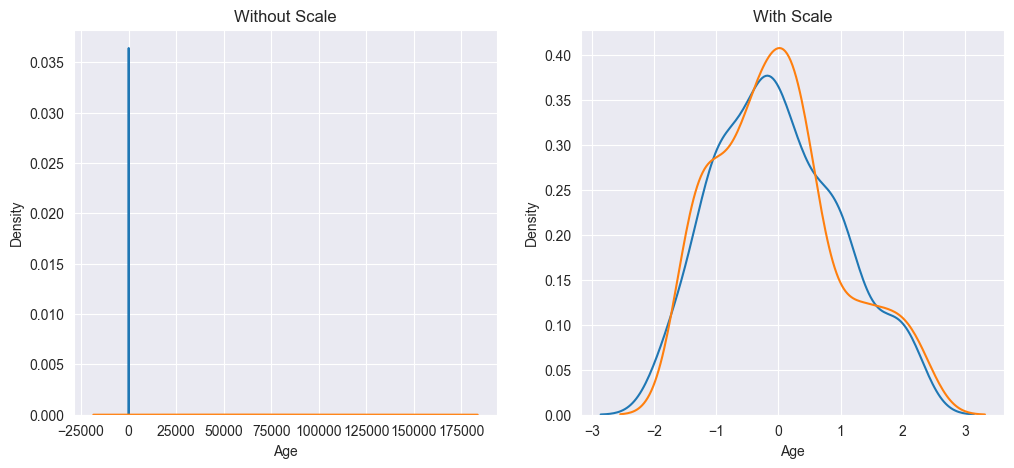

In [20]:
fig, (figure1, figure2) = plt.subplots(ncols = 2, figsize = (12, 5))
figure1.set_title('Without Scale')
sns.kdeplot(train_x['Age'], ax=figure1)
sns.kdeplot(train_x['EstimatedSalary'], ax=figure1)
figure2.set_title('With Scale')
sns.kdeplot(scale_train_x['Age'], ax=figure2)
sns.kdeplot(scale_train_x['EstimatedSalary'], ax=figure2)

/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'With Scaling')

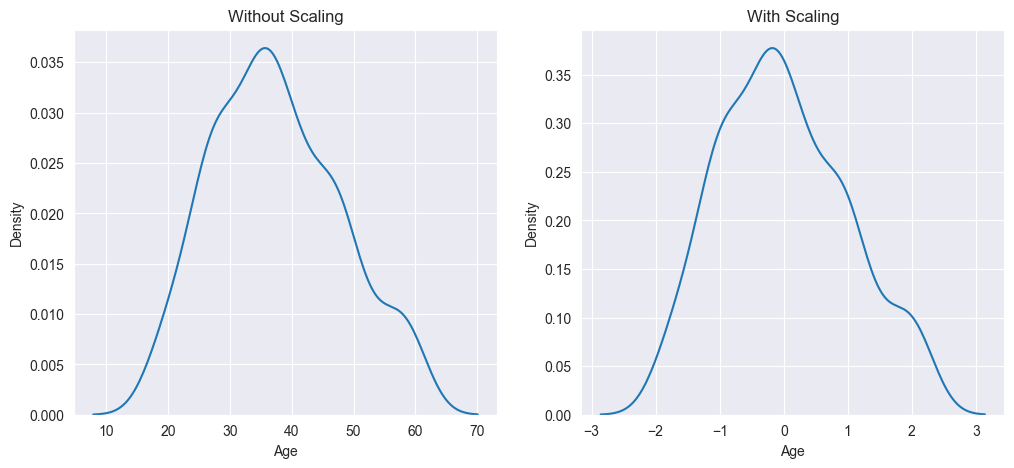

In [21]:
fig, (figure1, figure2) = plt.subplots(ncols=2, figsize = (12, 5))

figure1 = sns.kdeplot(train_x['Age'], ax=figure1)
figure1.set_title('Without Scaling')

figure2 = sns.kdeplot(scale_train_x['Age'], ax = figure2)
figure2.set_title('With Scaling')


/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'With Scaling')

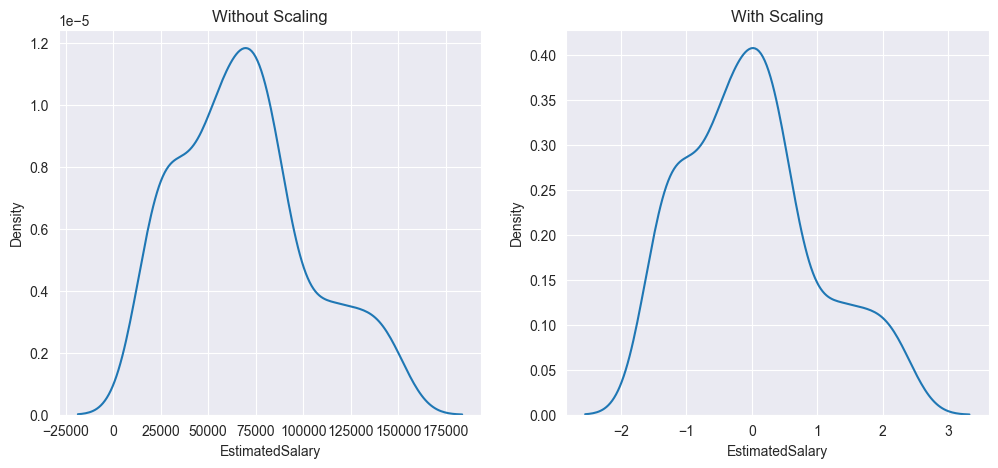

In [22]:
fig, (figure1, figure2) = plt.subplots(ncols=2, figsize = (12, 5))

figure1 = sns.kdeplot(train_x['EstimatedSalary'], ax=figure1)
figure1.set_title('Without Scaling')

figure2 = sns.kdeplot(scale_train_x['EstimatedSalary'], ax = figure2)
figure2.set_title('With Scaling')


In [23]:
from sklearn.linear_model import LogisticRegression 

In [24]:
model1 = LogisticRegression()
model2 = LogisticRegression()

In [25]:
model1.fit(train_x, train_y)
model2.fit(scale_train_x, train_y)

LogisticRegression()

In [26]:
pred_y = model1.predict(test_x)
scaled_pred_y = model2.predict(scale_test_x)

In [27]:
from sklearn.metrics import accuracy_score as score

In [28]:
print("with Scaling : ", score(scaled_pred_y, test_y))
print("without Scaling : ", score(pred_y, test_y))

with Scaling :  0.825
without Scaling :  0.8333333333333334


/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

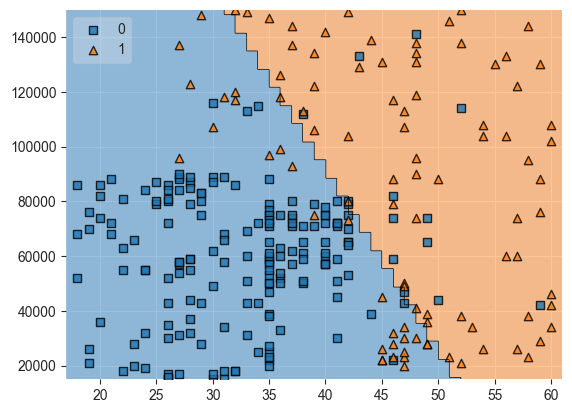

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(train_x.values, train_y.values, clf = model1, legend=2)

/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

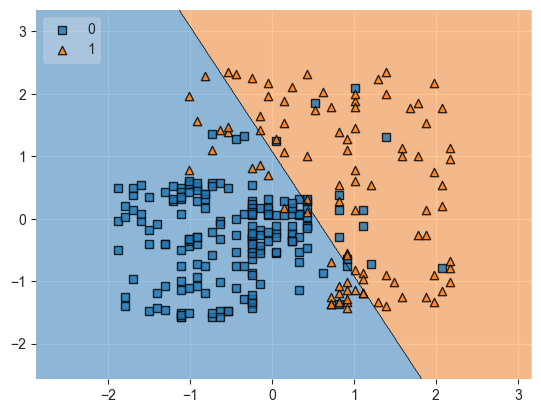

In [30]:
plot_decision_regions(scale_train_x.values, train_y.values, clf = model2, legend=2)